<a href="https://colab.research.google.com/github/Divya0701/MlModels/blob/main/multipleRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [140]:
import numpy as np

In [141]:
import pandas as pd

In [142]:
from matplotlib import pyplot as plt; import seaborn as sb


In [143]:
from numpy.linalg import svd,inv


In [ ]:
d=pd.read_csv("/content/cereals.csv")
print(d)


In [ ]:
y=d.iloc[:10,5]
y=y.values
print(y)

In [146]:
X=d.iloc[:10,0:5]
X.insert(0, "Age", [1,1,1,1,1,1,1,1,1,1], True) 
X=X.values

In [ ]:
print(X)

In [ ]:
print(d.shape)


In [ ]:
print(d.info)

In [ ]:
print(d.columns)

In [151]:
B=np.dot(np.linalg.inv(np.dot(X.T,X)), np.dot(X.T,y))


In [152]:
print(B)

[19.63684235  0.14562356  0.27605716 -2.92604722 -0.04124294  4.99968606]


In [153]:
actual_y=d.iloc[10:20,5]
actual_y=actual_y.values
print(actual_y)

[50.764999 19.823573 40.400208 22.736446 41.445019 45.863324 35.782791
 22.396513 40.448772 46.895644]


In [160]:
test_data=d.iloc[10:20,0:5]
test_data.insert(0, "Age", [1,1,1,1,1,1,1,1,1,1], True) 
test_data=test_data.values
print(test_data)

[[  1. 110.   6.   2. 290.   2.]
 [  1. 120.   1.   3. 210.   0.]
 [  1. 110.   3.   2. 140.   2.]
 [  1. 110.   1.   1. 180.   0.]
 [  1. 110.   2.   0. 280.   0.]
 [  1. 100.   2.   0. 290.   1.]
 [  1. 110.   1.   0.  90.   1.]
 [  1. 110.   1.   1. 180.   0.]
 [  1. 110.   3.   3. 140.   4.]
 [  1. 110.   2.   0. 220.   1.]]


In [165]:
y_pred=np.dot(test_data, B)
print(y_pred)

[29.49860153 19.94856728 34.85687125 25.58171437 24.65952462 27.79054568
 37.21931238 25.58171437 41.93019615 32.13378716]


In [156]:
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


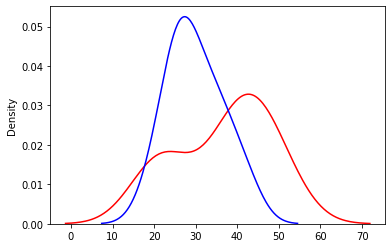

In [158]:
ax1=sns.distplot(actual_y,hist=False,color="r",label="Actual Values")
sns.distplot(y_pred,hist=False,color="b",label="Fitted values",ax=ax1)


 **Here i Have so much garbage data need to remove**

***Forward Featuring***

***we are using ssr to do this***

In [173]:
ssrs=[]

In [174]:
for i in range(1,10):
  yi=np.dot(X[:][:i+1], B)
  ssrs.append(sum((y[:][:i+1]-yi)**2))
  print(yi)

[72.64395117 32.69033285]
[72.64395117 32.69033285 62.28268273]
[72.64395117 32.69033285 62.28268273 92.24384204]
[72.64395117 32.69033285 62.28268273 92.24384204 30.43125341]
[72.64395117 32.69033285 62.28268273 92.24384204 30.43125341 36.05186659]
[72.64395117 32.69033285 62.28268273 92.24384204 30.43125341 36.05186659
 34.88233654]
[72.64395117 32.69033285 62.28268273 92.24384204 30.43125341 36.05186659
 34.88233654 42.11918577]
[72.64395117 32.69033285 62.28268273 92.24384204 30.43125341 36.05186659
 34.88233654 42.11918577 49.9085468 ]
[72.64395117 32.69033285 62.28268273 92.24384204 30.43125341 36.05186659
 34.88233654 42.11918577 49.9085468  22.46218509]


In [175]:
print(ssrs)

[19.65864012481171, 27.822104727675363, 29.956830145616454, 30.80638390443759, 39.08795899650501, 43.73726721994562, 92.75220958323729, 104.3480474757742, 123.87856128438403]


In [177]:
NewY=np.dot(test_data[:][:6],B)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


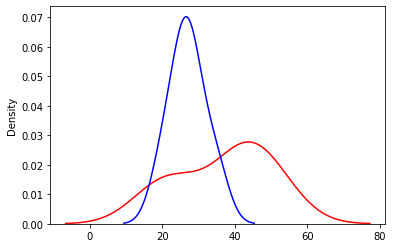

In [178]:
ax2=sns.distplot(actual_y[:6],hist=False,color="r",label="Actual Values")
sns.distplot(NewY,hist=False,color="b",label="Fitted values",ax=ax2)